# <center>Tickets Monitoring Analyzer</center>

<b><p style="text-align:right;">Kumar Anurag</p></b>
<p style="text-align:right;color:blue">2021FC04016</p>

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

### Loading Dataset

In [2]:
cherwell_data = pd.read_csv('dataset_large.csv')
cherwell_data.head(20)

,Type,Owned By Team,Customer Name,ID,Priority,Created Date Time,Status,Short Description,Category,Service,Subcategory,SLA Resolve By Deadline,Action Taken
0,Incident,CSM_TEAM_CS_TCS_Windows_VMWare_Team,Solarwinds Customer,2798425,3,6/19/23 2:48,Closed,Host lbjesx02.lbj.is.smartgurucool.com is Down,smartgurucool - Windows,Cloud and Server Computing,"OS, HW, Performance Issue",6/21/23 2:50,"Check if there's any planned outage going on, ..."
1,Incident,CSM_TEAM_CS_TCS_Windows_VMWare_Team,Solarwinds Customer,2798418,3,6/19/23 2:45,Closed,Host lbjavscan1.lbj.is.smartgurucool.com is Down,smartgurucool - Windows,Cloud and Server Computing,"OS, HW, Performance Issue",6/21/23 2:47,"Check if there's any planned outage going on, ..."
2,Incident,CSM_TEAM_CS_TCS_Windows_VMWare_Team,Solarwinds Customer,2798416,3,6/19/23 2:45,Closed,Host uscal-pixoslic1.lbj.is.smartgurucool.com ...,smartgurucool - Windows,Cloud and Server Computing,"OS, HW, Performance Issue",6/21/23 2:47,"Check if there's any planned outage going on, ..."
3,Incident,CSM_TEAM_CS_TCS_Windows_VMWare_Team,Solarwinds Customer,2798415,3,6/19/23 2:44,Closed,Host lbjvprox1.lbj.is.smartgurucool.com is Down,smartgurucool - Windows,Cloud and Server Computing,"OS, HW, Performance Issue",6/21/23 2:46,"Check if there's any planned outage going on, ..."
4,Incident,CSM_TEAM_CS_TCS_Windows_VMWare_Team,Solarwinds Customer,2798413,3,6/19/23 2:43,Closed,Host us-lbj-dc02.ad.smartgurucool.com is Down,smartgurucool - Windows,Cloud and Server Computing,"OS, HW, Performance Issue",6/21/23 2:45,"Check if there's any planned outage going on, ..."
5,Incident,CSM_TEAM_CS_TCS_Windows_VMWare_Team,Solarwinds Customer,2798410,3,6/19/23 2:42,Closed,Host us-lbj-dc01.ad.smartgurucool.com is Down,smartgurucool - Windows,Cloud and Server Computing,"OS, HW, Performance Issue",6/21/23 2:44,"Check if there's any planned outage going on, ..."
6,Incident,CSM_TEAM_CS_TCS_Windows_VMWare_Team,Solarwinds Customer,2798404,3,6/19/23 2:41,Closed,Host setoolslbj.lbj.is.smartgurucool.com is Down,smartgurucool - Windows,Cloud and Server Computing,"OS, HW, Performance Issue",6/21/23 2:43,"Check if there's any planned outage going on, ..."
7,Incident,CSM_TEAM_CS_TCS_Windows_VMWare_Team,Solarwinds Customer,2798401,3,6/19/23 2:40,Closed,Host pixoslic1.lbj.is.smartgurucool.com is Down,smartgurucool - Windows,Cloud and Server Computing,"OS, HW, Performance Issue",6/21/23 2:42,"Check if there's any planned outage going on, ..."
8,Incident,CSM_TEAM_CS_TCS_Windows_VMWare_Team,Solarwinds Customer,2798399,3,6/19/23 2:39,Closed,Host pixoslic1.lbj.is.smartgurucool.com is Down,smartgurucool - Windows,Cloud and Server Computing,"OS, HW, Performance Issue",6/21/23 2:41,"Check if there's any planned outage going on, ..."
9,Incident,CSM_TEAM_CS_TCS_Windows_VMWare_Team,Solarwinds Customer,2798396,3,6/19/23 2:38,Closed,Host wlbjcmdp01.lbj.is.smartgurucool.com is Down,smartgurucool - Windows,Cloud and Server Computing,"OS, HW, Performance Issue",6/21/23 2:40,"Check if there's any planned outage going on, ..."


### Data Preprocessing

In [15]:
filename = "dataset_large.csv"

fields = []
rows = []

# reading the csv file
with open(filename,'r') as csvfile:
    csvreader = csv.reader(csvfile)
    fields = next(csvreader)
    for row in csvreader:
        rows.append(row)
csvfile.close()

# START OF LOGIC

def fetch_servers():
    row_count = 0
    server_count = 0
    unique_fetched_servers = []
    random_servers= ["smartgurucool.com","addev.lab","HCHSWPOLLER","BBNSWPOLLER","COSSWWEB1","lnxtstclus1k","bbnswpoller2","lincortap4","HCHSWPOLLER2","pwa8","tcdweb3","lnxtstclus1k","cldagt01","lcoslogs01","lcossdo08","COSSWLOGPOLLER","lcossdo2","lcosiscxbaa301","3dxdse1","COSSWPOLLER"]

    for row in rows:
        l = row[7].split()
        row_count += 1

        empty = True

        for i in l:
            for j in random_servers:
                if j.lower() in i.lower():
                    server_count += 1
                    # removing comma from the end
                    if "," in i:
                        i = i[:-1]
                    if i not in unique_fetched_servers:
                        unique_fetched_servers.append(i)
                    row.append(i)
                    empty = False
                    break
        
        if empty == True:
            row.append("")

    print('-----------------------------------------')
    print('FETCHING SERVERS')
    print('Updated Row Count:',server_count)
    print('Total Row Count:',row_count)
    print('Unique fetched servers:',len(unique_fetched_servers))
    print('-----------------------------------------')
    return unique_fetched_servers

def detect_category():
    row_count = 0
    server_count = 0

    for row in rows:
        l = row[7].split()
        row_count += 1

        empty = True

        for i in l:
            if "cpu" in i.lower():
                server_count += 1
                row.append("CPU")
                empty = False
                break

            if "memory" in i.lower():
                server_count += 1
                row.append("Memory")
                empty = False
                break

            if "host" in i.lower():
                server_count += 1
                row.append("Host")
                empty = False
                break

            if "label" in i.lower():
                server_count += 1
                row.append("Disk")
                empty = False
                break

            if "tenable" in i.lower():
                server_count += 1
                row.append("Tenable")
                empty = False
                break
        
        if empty == True:
            row.append("")

    print('-----------------------------------------')
    print('DETECTING CATEGORY')
    print('Updated Row Count:',server_count)
    print('Total Row Count:',row_count)
    print('-----------------------------------------')

def generate_report(unique_fetched_servers):
    generated_report_rows = []
    
    for server in unique_fetched_servers:
        cpu_count = 0
        memory_count = 0
        disk_count = 0
        generate_report_single_row = []
        generate_report_single_row.append(server)
        for row in rows:
            if (server == row[-2]) and (row[-1] == "CPU"):
                cpu_count += 1
            if (server == row[-2]) and (row[-1] == "Memory"):
                memory_count += 1
            if (server == row[-2]) and (row[-1] == "Disk"):
                disk_count += 1
        generate_report_single_row.append(cpu_count)
        generate_report_single_row.append(memory_count)
        generate_report_single_row.append(disk_count)
        generated_report_rows.append(generate_report_single_row)
        print(generate_report_single_row)

    return generated_report_rows


# calling functions
unique_fetched_servers = fetch_servers() 
detect_category()
generated_report_rows = generate_report(unique_fetched_servers)

# END OF LOGIC

# saving the csv files

writeFileName = 'updatedData.csv'
fields.append("Fetched Server")
fields.append("Fetched Category")
with open(writeFileName, 'w',newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(fields)
    csvwriter.writerows(rows)
csvfile.close()

writeFileName = 'generatedReport.csv'
report_fields = ["Server Name","CPU Ticket Count","Memory Ticket Count","Disk Ticket Count"]
with open(writeFileName, 'w',newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(report_fields)
    csvwriter.writerows(generated_report_rows)
csvfile.close()

-----------------------------------------
FETCHING SERVERS
Updated Row Count: 200000
Total Row Count: 200000
Unique fetched servers: 2178
-----------------------------------------
-----------------------------------------
DETECTING CATEGORY
Updated Row Count: 200000
Total Row Count: 200000
-----------------------------------------
['lbjesx02.lbj.is.smartgurucool.com', 0, 0, 0]
['lbjavscan1.lbj.is.smartgurucool.com', 300, 0, 0]
['uscal-pixoslic1.lbj.is.smartgurucool.com', 10, 0, 0]
['lbjvprox1.lbj.is.smartgurucool.com', 30, 0, 0]
['us-lbj-dc02.ad.smartgurucool.com', 0, 0, 0]
['us-lbj-dc01.ad.smartgurucool.com', 0, 0, 0]
['setoolslbj.lbj.is.smartgurucool.com', 0, 0, 0]
['pixoslic1.lbj.is.smartgurucool.com', 0, 0, 0]
['wlbjcmdp01.lbj.is.smartgurucool.com', 0, 0, 0]
['wcoscmp1.cos.is.smartgurucool.com', 360, 20, 120]
['wpngscfs02.png.is.smartgurucool.com', 0, 30, 160]
['wcoscmd1.cos.is.smartgurucool.com', 10, 0, 20]
['csbldvm3u.srs.is.smartgurucool.com', 0, 170, 60]
['wcossap2.cos.is.smart

['wcoscopek.cos.is.smartgurucool.com', 0, 10, 40]
['cstcram1.cos.is.smartgurucool.com', 60, 0, 0]
['whchlncomm01.hch.is.smartgurucool.com', 0, 410, 50]
['wcosspmig03.cos.is.smartgurucool.com', 0, 220, 0]
['kcosvx48.cos.is.smartgurucool.com', 0, 0, 0]
['kcosvx48proxy.cos.is.smartgurucool.com', 20, 0, 0]
['kcosvx47proxy.cos.is.smartgurucool.com', 0, 0, 0]
['kcosvx46.cos.is.smartgurucool.com', 0, 0, 0]
['ggnfpga02.ggn.is.smartgurucool.com', 0, 4120, 0]
['kcosesxproxy32.cos.is.smartgurucool.com', 0, 0, 0]
['kcosvx45.cos.is.smartgurucool.com', 0, 0, 0]
['kcosvx45proxy.cos.is.smartgurucool.com', 0, 0, 0]
['kcosvx44proxy.cos.is.smartgurucool.com', 0, 0, 0]
['us-dmz-dc04.windmz.dmz.smartgurucool.com', 0, 0, 0]
['cbvaltdrp01.srs.is.smartgurucool.com', 0, 0, 0]
['kcosvx43.cos.is.smartgurucool.com', 0, 0, 0]
['kcosvx43proxy.cos.is.smartgurucool.com', 20, 0, 0]
['kcosvx42.cos.is.smartgurucool.com', 0, 0, 0]
['kcosvx41.cos.is.smartgurucool.com', 0, 0, 0]
['kcosvx42proxy.cos.is.smartgurucool.com', 0

['eprdadg01.cos.is.smartgurucool.com', 300, 0, 0]
['wcosdfm2k.cos.is.smartgurucool.com', 30, 0, 40]
['wcosdatagateway.cos.is.smartgurucool.com', 0, 0, 40]
['etmsbld-cos04.cos.is.smartgurucool.com', 290, 0, 30]
['lcdsdev.cos.is.smartgurucool.com', 0, 10, 0]
['kcosvx40.cos.is.smartgurucool.com', 0, 0, 0]
['kcosvx28.cos.is.smartgurucool.com', 0, 0, 0]
['kcosvx39.cos.is.smartgurucool.com', 0, 0, 0]
['wcosjamst1.cos.is.smartgurucool.com', 0, 0, 50]
['kcosvx40proxy.cos.is.smartgurucool.com', 40, 0, 0]
['kcosvx38.cos.is.smartgurucool.com', 0, 0, 0]
['wcoseggptetc2.cos.is.smartgurucool.com', 80, 60, 10]
['kcosvx38proxy.cos.is.smartgurucool.com', 10, 0, 0]
['cosavscan3.cos.is.smartgurucool.com', 0, 0, 0]
['postsaleseggpt1.cos.is.smartgurucool.com', 30, 0, 0]
['COSSWWEB1', 10, 0, 0]
['lbbnfpga2.bbn.is.smartgurucool.com', 0, 0, 0]
['wcosucmsql1.cos.is.smartgurucool.com', 20, 0, 0]
['wcospkicdp-ext.cos.dmz.smartgurucool.com', 20, 0, 0]
['tcs-dbsk.ggn.is.smartgurucool.com', 50, 0, 0]
['sceboa91.png

['ldrpedi1.dfw.is.smartgurucool.com', 0, 0, 0]
['lxdev.lin.is.smartgurucool.com', 0, 0, 0]
['wcosjmpbx0.cos.is.smartgurucool.com', 0, 0, 0]
['lcosasapprov.cos.is.smartgurucool.com', 0, 0, 0]
['kcosvxproxy06.cos.is.smartgurucool.com', 50, 0, 0]
['gpmt-build2.png.is.smartgurucool.com', 0, 0, 30]
['wcospem.cos.is.smartgurucool.com', 20, 0, 90]
['wcospmadb01.cos.is.smartgurucool.com', 10, 50, 0]
['wcoslncomm01.cos.is.smartgurucool.com', 10, 0, 0]
['wbbncmps1.bbn.is.smartgurucool.com', 0, 0, 50]
['jabsrv2-new.jab.png.bp.smartgurucool.com', 0, 0, 0]
['etmsjenkins01.cos.is.smartgurucool.com', 0, 0, 0]
['wcostenio2.cos.is.smartgurucool.com', 310, 0, 0]
['wcospsql1k.cos.is.smartgurucool.com', 40, 0, 0]
['wsgpexaminer1.sgp.is.smartgurucool.com', 40, 0, 10]
['wcosopelecd1.cos.is.smartgurucool.com', 10, 30, 0]
['xzmesx02.xzm.is.smartgurucool.com', 0, 0, 0]
['xzmesx03.xzm.is.smartgurucool.com', 0, 0, 0]
['xzmbkp1.xzm.is.smartgurucool.com', 0, 0, 0]
['wcsgoransrv01.xzm.is.smartgurucool.com', 0, 0, 6

['lkobartap01.kob.is.smartgurucool.com', 0, 0, 0]
['presidio2n.png.is.smartgurucool.com', 0, 0, 0]
['oflb3.png.is.smartgurucool.com', 0, 0, 0]
['ofweb12.png.is.smartgurucool.com', 0, 0, 0]
['sgpfpbx1.sgp.is.smartgurucool.com', 0, 0, 0]
['ofdb6.png.is.smartgurucool.com', 0, 0, 0]
['ofdb4.png.is.smartgurucool.com', 0, 0, 0]
['ofweb9.png.is.smartgurucool.com', 0, 0, 0]
['ofweb10.png.is.smartgurucool.com', 0, 0, 0]
['kobmcd1s.kob.is.smartgurucool.com', 0, 0, 0]
['wsgpdba1.sgp.is.smartgurucool.com', 20, 0, 300]
['wccucmdp01.ccu.is.smartgurucool.com', 0, 0, 0]
['HCHSWPOLLER2', 10, 0, 0]
['cidwrlk.ctu.is.smartgurucool.com', 0, 0, 0]
['whchlls01.hch.is.smartgurucool.com', 0, 0, 0]
['HCHSWPOLLER', 0, 0, 0]
['wbeills01.bei.is.smartgurucool.com', 0, 0, 0]
['bjbkp02.bei.is.smartgurucool.com', 0, 0, 0]
['beiavscan2.bei.is.smartgurucool.com', 0, 10, 10]
['esvob3.bei.is.smartgurucool.com', 0, 0, 0]
['wbeicmss1.bei.is.smartgurucool.com', 0, 0, 370]
['mxpfsgp2.sgp.is.smartgurucool.com', 0, 0, 0]
['myss

['edicc1.edi.is.smartgurucool.com', 0, 0, 0]
['sqflicence1.edi.is.smartgurucool.com', 0, 0, 0]
['mxpfedi2.edi.is.smartgurucool.com', 0, 0, 0]
['ofdb1.agp.is.smartgurucool.com', 0, 0, 0]
['malssynck.agp.is.smartgurucool.com', 0, 0, 0]
['threatsim03.buh.is.smartgurucool.com', 0, 0, 0]
['airmosaicdocker.lin.is.smartgurucool.com', 0, 0, 0]
['oflb1.agp.is.smartgurucool.com', 0, 0, 0]
['mxpsup2.cos.is.smartgurucool.com', 0, 0, 0]
['bjreportsvr.bei.is.smartgurucool.com', 0, 0, 10]
['lbuhartap01.buh.is.smartgurucool.com', 0, 0, 0]
['mildnssniff01.lin.is.smartgurucool.com', 0, 0, 0]
['amlicenseserver.lin.is.smartgurucool.com', 0, 0, 0]
['rotgrid1.rot.is.smartgurucool.com', 0, 0, 0]
['llinfpga02.lin.is.smartgurucool.com', 0, 0, 0]
['ofdb2.agp.is.smartgurucool.com', 0, 0, 0]
['atsbbmirror16.agp.is.smartgurucool.com', 0, 0, 0]
['sdrltecomp.lin.is.smartgurucool.com', 0, 0, 0]
['fpgalicense2.lin.is.smartgurucool.com', 0, 0, 0]
['lrottmtest.rot.is.smartgurucool.com', 0, 0, 0]
['lindnssniff01.lin.is.s

['finoultfs03jump.oul.is.smartgurucool.com', 10, 0, 0]
['wolljenkins1.oul.is.smartgurucool.com', 0, 0, 0]
['fin-oul-dc2.ad.smartgurucool.com', 0, 0, 0]
['ofweb4.srs.is.smartgurucool.com', 0, 10, 0]
['eggplantsut1.cos.is.smartgurucool.com', 30, 0, 0]
['wshccmdp1.shc.is.smartgurucool.com', 0, 0, 0]
['lbbnfpga13.bbn.is.smartgurucool.com', 0, 0, 0]
['brazilreportsvr.cos.is.smartgurucool.com', 80, 0, 0]
['cosgrid192.cos.is.smartgurucool.com', 0, 0, 0]
['cldesx17.cos.is.smartgurucool.com', 0, 0, 0]
['gitfox8.cos.is.smartgurucool.com', 0, 0, 0]
['pwa8', 0, 0, 0]
['bvueweb01.windmz.dmz.smartgurucool.com', 30, 0, 0]
['jabctdsrv01.jab.png.bp.smartgurucool.com', 0, 0, 320]
['wggncmss01.ggn.is.smartgurucool.com', 0, 0, 260]
['gitfoxci1.cos.is.smartgurucool.com', 0, 0, 0]
['atspmigrate01.cos.is.smartgurucool.com', 30, 0, 0]
['meulbroe.cos.is.smartgurucool.com', 0, 10, 0]
['wcosintunetst.cos.is.smartgurucool.com', 10, 20, 0]
['wcosjamsp1.cos.is.smartgurucool.com', 30, 0, 0]
['bree.cos.is.smartguruco

['wdfwsastadbdr.dfw.is.smartgurucool.com', 0, 0, 0]
['dfwbkp1.dfw.is.smartgurucool.com', 0, 0, 0]
['tfsp7ddb1.dfw.is.smartgurucool.com', 0, 0, 0]
['wdfwchrwdr01.dfw.is.smartgurucool.com', 0, 0, 0]
['tfsp7dssrs.dfw.is.smartgurucool.com', 0, 0, 0]
['wdfwaedgedr1.dfw.is.smartgurucool.com', 0, 0, 0]
['wdfwepmdbdr1.dfw.is.smartgurucool.com', 0, 0, 0]
['wdfwpkientca.dfw.is.smartgurucool.com', 0, 0, 0]
['wdfwpkientca3.dfw.is.smartgurucool.com', 0, 0, 0]
['wdfwjamsdr1.dfw.is.smartgurucool.com', 0, 0, 0]
['wdfwspw01k.dfw.is.smartgurucool.com', 0, 0, 0]
['tfsp7dapp2.dfw.is.smartgurucool.com', 0, 0, 0]
['tfsp7dapp1.dfw.is.smartgurucool.com', 0, 0, 0]
['wdfwidapk.dfw.dmz.smartgurucool.com', 0, 0, 0]
['drbkp1.dfw.is.smartgurucool.com', 0, 0, 0]
['tcdweb3', 0, 0, 0]
['tcdweb2.cos.is.smartgurucool.com', 0, 0, 0]
['wcosadtlp06k.cos.is.smartgurucool.com', 0, 20, 10]
['rydberg.scs.is.smartgurucool.com', 0, 0, 0]
['belgium4.cos.is.smartgurucool.com', 0, 10, 0]
['lcosksmdbt.cos.is.smartgurucool.com', 0, 0

['wtefcmdp1.tef.is.smartgurucool.com', 0, 0, 0]
['wtefesfilesrv.tef.is.smartgurucool.com', 10, 0, 0]
['ofdb2.bom.is.smartgurucool.com', 0, 0, 0]
['oflb1.bom.is.smartgurucool.com', 0, 0, 0]
['bomcad02.bom.is.smartgurucool.com', 0, 0, 0]
['bomavscan1.bom.is.smartgurucool.com', 0, 0, 0]
['sl-terminal.bom.is.smartgurucool.com', 0, 0, 0]
['wbomcmdp01.bom.is.smartgurucool.com', 0, 0, 0]
['wbomcad1.bom.is.smartgurucool.com', 0, 0, 0]
['weplanlicense.bom.is.smartgurucool.com', 0, 0, 0]
['hwsim01.bom.is.smartgurucool.com', 0, 0, 0]
['wmiccad01.mic.is.smartgurucool.com', 0, 0, 0]
['ttwb-license.bom.is.smartgurucool.com', 0, 0, 0]
['ofdb1.bom.is.smartgurucool.com', 0, 0, 0]
['rotesx3.rot.is.smartgurucool.com', 0, 0, 0]
['rotesx4.rot.is.smartgurucool.com', 0, 0, 0]
['rsmbkp01.rsm.is.smartgurucool.com', 0, 0, 0]
['wksbrz01.sbd.is.smartgurucool.com', 0, 0, 0]
['wrsmm1dbp01.rsm.is.smartgurucool.com', 0, 0, 0]
['rsmavscan1.rsm.is.smartgurucool.com', 0, 0, 0]
['rsmesx02.rsm.is.smartgurucool.com', 0, 0,

['csps8.cos.is.smartgurucool.com', 0, 0, 20]
['wdfwexedge02.dfw.dmz.smartgurucool.com', 30, 0, 0]
['ld02.bom.is.smartgurucool.com', 0, 0, 0]
['pulsarxlbldvm11.bbn.is.smartgurucool.com', 10, 0, 0]
['wcosslsc1.cos.is.smartgurucool.com', 10, 0, 10]
['wpngmfgprod1.png.is.smartgurucool.com', 20, 0, 0]
['ksrsvx01.srs.is.smartgurucool.com', 0, 0, 0]
['mxdse2.cos.is.smartgurucool.com', 0, 0, 0]
['bvwesx01.bvw.is.smartgurucool.com', 0, 0, 0]
['bvwavscan2.bvw.is.smartgurucool.com', 0, 0, 0]
['bvwbkp1.bvw.is.smartgurucool.com', 0, 0, 0]
['atsbbmirror06.bvw.is.smartgurucool.com', 0, 0, 0]
['wbvwcmdp1.bvw.is.smartgurucool.com', 0, 0, 0]
['bvwssync.bvw.is.smartgurucool.com', 0, 0, 0]
['bvwdnssniff01.bvw.is.smartgurucool.com', 0, 0, 0]
['lbvwartap01.bvw.is.smartgurucool.com', 0, 0, 0]
['edevdb07.cos.is.smartgurucool.com', 60, 0, 0]
['viztech.atl.is.smartgurucool.com', 0, 0, 0]
['pwa11.sgp.dmz.smartgurucool.com', 0, 0, 0]
['wcosswp01k.cos.is.smartgurucool.com', 10, 0, 0]
['edevdb06.cos.is.smartgurucoo

['lincortasp16.cos.is.smartgurucool.com', 0, 0, 0]
['wcossox4k.cos.is.smartgurucool.com', 10, 0, 0]
['rejoin.scs.is.smartgurucool.com', 0, 0, 0]
['cstcram2d.cos.is.smartgurucool.com', 10, 0, 0]
['COSSWLOGPOLLER', 70, 0, 0]
['wcoscmf01p.cos.is.smartgurucool.com', 10, 0, 0]
['cldesx25.cos.is.smartgurucool.com', 0, 0, 0]
['cldesxproxy25.cos.is.smartgurucool.com', 0, 0, 0]
['hchesx5.hch.is.smartgurucool.com', 0, 0, 0]
['.png.is.smartgurucool.com', 0, 0, 0]
['biprddb1.cos.is.smartgurucool.com', 0, 0, 0]
['edcswebt.cos.is.smartgurucool.com', 0, 0, 0]
['emcmgmt02.cos.is.smartgurucool.com', 0, 0, 0]
['ebsprdadg1.cos.is.smartgurucool.com', 0, 0, 0]
['aixtst2.cos.is.smartgurucool.com', 0, 0, 0]
['dfwesx01.dfw.is.smartgurucool.com', 0, 0, 0]
['hchesx4.hch.is.smartgurucool.com', 0, 0, 0]
['cmdtst.cos.is.smartgurucool.com', 0, 0, 0]
['cosssynck.cos.is.smartgurucool.com', 0, 0, 0]
['cldesx75.cos.is.smartgurucool.com', 0, 0, 0]
['barney2.hnl.is.smartgurucool.com', 0, 0, 0]
['esldb01.ggn.is.smartguruc

['pngpeta-h1.png.is.smartgurucool.com', 0, 40, 0]
['blaesx06.bla.is.smartgurucool.com', 0, 0, 0]
['lcosoms1.cos.is.smartgurucool.com', 0, 0, 0]
['lcosoemdb.cos.is.smartgurucool.com', 0, 0, 0]
['coscsesx01.cos.is.smartgurucool.com', 0, 0, 0]
['lcossdo2', 0, 0, 0]
['bidtlofs2.png.is.smartgurucool.com', 0, 0, 0]
['ctdmagds2u.png.is.smartgurucool.com', 0, 0, 0]
['mcdpadb22.png.is.smartgurucool.com', 0, 0, 0]
['petafieldapp.png.is.smartgurucool.com', 0, 0, 0]
['pngpeta-h2.png.is.smartgurucool.com', 0, 0, 0]
['pngpeta-s1.png.is.smartgurucool.com', 0, 0, 0]
['mcdpadb21.png.is.smartgurucool.com', 0, 0, 0]
['pedofweb1.png.is.smartgurucool.com', 0, 0, 0]
['pngecad2.png.is.smartgurucool.com', 0, 0, 0]
['wpngdot1.png.is.smartgurucool.com', 0, 0, 0]
['wpnghive01.png.is.smartgurucool.com', 10, 0, 0]
['wpngap01.png.is.smartgurucool.com', 0, 0, 0]
['edibkp02.edi.is.smartgurucool.com', 0, 0, 0]
['wpnglncomm02.png.is.smartgurucool.com', 0, 30, 0]
['wpngpadb02.png.is.smartgurucool.com', 0, 0, 0]
['wpngpa

['lcossdo5.cos.is.smartgurucool.com', 0, 0, 0]
['lcossdo02.cos.is.smartgurucool.com', 0, 0, 0]
['spyglass.srs.is.smartgurucool.com', 0, 0, 0]
['wsrsesprit.srs.is.smartgurucool.com', 0, 0, 0]
['tfsproxy-sr.srs.is.smartgurucool.com', 0, 10, 0]
['ike3.srs.is.smartgurucool.com', 0, 0, 0]
['wsrskey1.srs.is.smartgurucool.com', 0, 0, 0]
['wsrspadbld1.srs.is.smartgurucool.com', 0, 0, 0]
['mfrs.srs.is.smartgurucool.com', 0, 0, 0]
['wcsgpwbirobot01.srs.is.smartgurucool.com', 0, 0, 0]
['wsrslncomm02.srs.is.smartgurucool.com', 0, 0, 0]
['wcsgeggplant01.srs.is.smartgurucool.com', 0, 0, 0]
['wsqcsdev02.srs.is.smartgurucool.com', 0, 0, 0]
['wsrsforensicsk1.srs.is.smartgurucool.com', 0, 0, 0]
['etmsbld-srs02.srs.is.smartgurucool.com', 0, 0, 0]
['etmsbld-srs04.srs.is.smartgurucool.com', 0, 0, 0]
['mxpfsrs2.srs.is.smartgurucool.com', 0, 0, 0]
['srsmlar02.srs.is.smartgurucool.com', 0, 0, 0]
['srsqedw01.srs.is.smartgurucool.com', 0, 0, 0]
['mlarsr1.srs.is.smartgurucool.com', 0, 0, 0]
['calsofthubbroker.sr

### Feature Engineering

In [4]:
dataset = pd.read_csv('generatedReport.csv')
dataset.head(10)

,Server Name,CPU Ticket Count,Memory Ticket Count,Disk Ticket Count
0,lbjesx02.lbj.is.smartgurucool.com,0,0,0
1,lbjavscan1.lbj.is.smartgurucool.com,300,0,0
2,uscal-pixoslic1.lbj.is.smartgurucool.com,10,0,0
3,lbjvprox1.lbj.is.smartgurucool.com,30,0,0
4,us-lbj-dc02.ad.smartgurucool.com,0,0,0
5,us-lbj-dc01.ad.smartgurucool.com,0,0,0
6,setoolslbj.lbj.is.smartgurucool.com,0,0,0
7,pixoslic1.lbj.is.smartgurucool.com,0,0,0
8,wlbjcmdp01.lbj.is.smartgurucool.com,0,0,0
9,wcoscmp1.cos.is.smartgurucool.com,360,20,120


In [5]:
# extracting host name from FQDN

for index, row in dataset.iterrows():
    dataset.at[index, 'HostName'] = row['Server Name'].split('.')[0]
dataset.head(10)

,Server Name,CPU Ticket Count,Memory Ticket Count,Disk Ticket Count,HostName
0,lbjesx02.lbj.is.smartgurucool.com,0,0,0,lbjesx02
1,lbjavscan1.lbj.is.smartgurucool.com,300,0,0,lbjavscan1
2,uscal-pixoslic1.lbj.is.smartgurucool.com,10,0,0,uscal-pixoslic1
3,lbjvprox1.lbj.is.smartgurucool.com,30,0,0,lbjvprox1
4,us-lbj-dc02.ad.smartgurucool.com,0,0,0,us-lbj-dc02
5,us-lbj-dc01.ad.smartgurucool.com,0,0,0,us-lbj-dc01
6,setoolslbj.lbj.is.smartgurucool.com,0,0,0,setoolslbj
7,pixoslic1.lbj.is.smartgurucool.com,0,0,0,pixoslic1
8,wlbjcmdp01.lbj.is.smartgurucool.com,0,0,0,wlbjcmdp01
9,wcoscmp1.cos.is.smartgurucool.com,360,20,120,wcoscmp1


In [6]:
# total no of records

dataset.shape

(2178, 5)

In [7]:
# checking the datatypes

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2178 entries, 0 to 2177
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Server Name          2178 non-null   object
 1   CPU Ticket Count     2178 non-null   int64 
 2   Memory Ticket Count  2178 non-null   int64 
 3   Disk Ticket Count    2178 non-null   int64 
 4   HostName             2178 non-null   object
dtypes: int64(3), object(2)
memory usage: 85.2+ KB


### Bar Graph Visualization

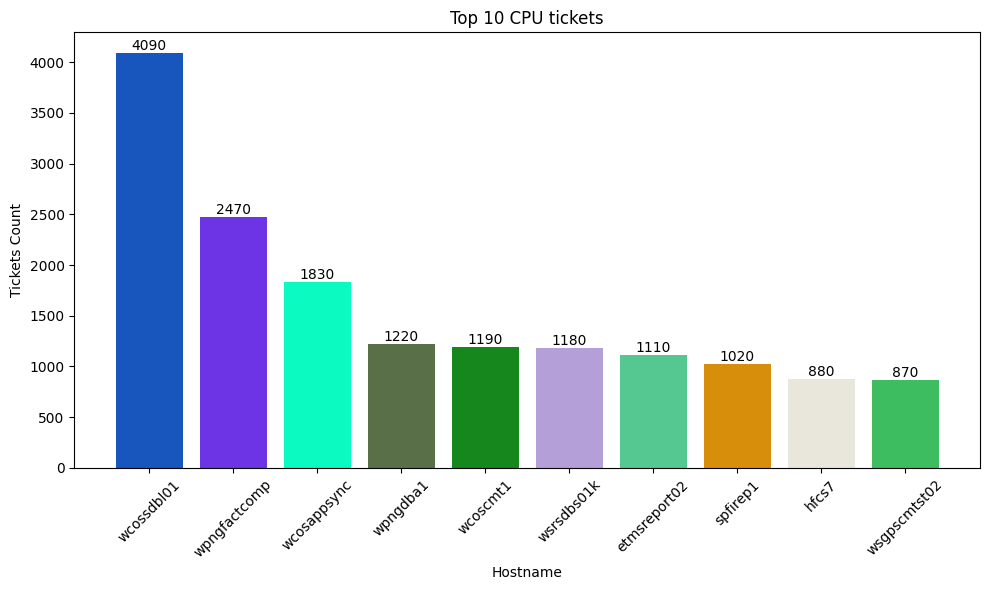

In [8]:
# Top 10 CPU Tickets

top_cpu = dataset.sort_values(by=['CPU Ticket Count'], ascending=False).head(10)
x = top_cpu['HostName']
y = top_cpu['CPU Ticket Count']
num_bars = len(x)  # Number of bars
random_colors = np.random.rand(num_bars, 3)  # Generate random RGB values for each bar
plt.figure(figsize=(10,6))
plt.bar(x,y,color=random_colors)
plt.title('Top 10 CPU tickets')
plt.xlabel('Hostname')
plt.ylabel('Tickets Count')
# Add values on top of the bars
for i, v in enumerate(y):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=10)  # Adjust the offset (0.1) and font size as needed
plt.xticks(rotation=45)
plt.tight_layout() # space adjustment
plt.show()

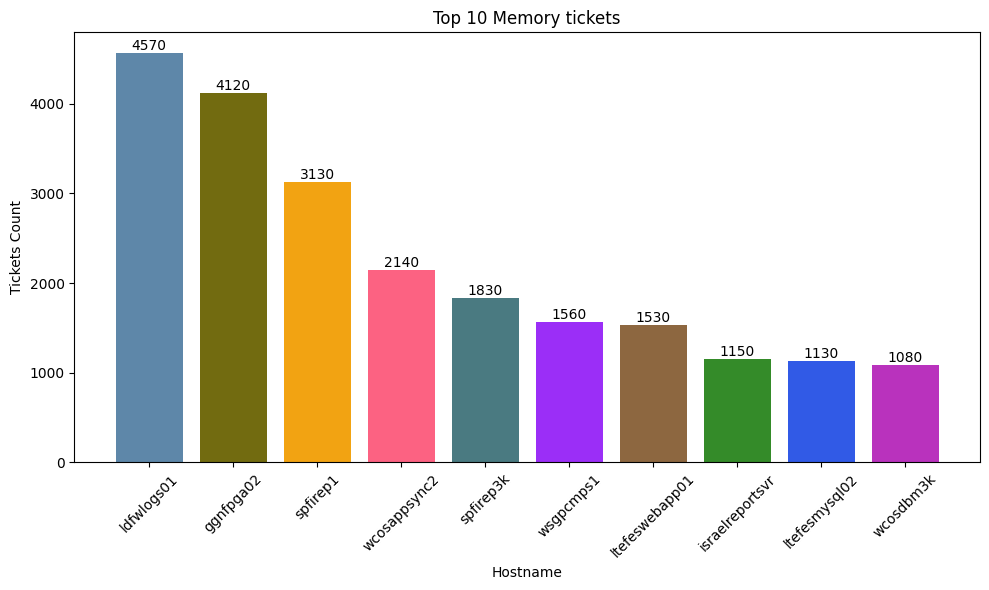

In [9]:
# Top 10 Memory Tickets

top_memory = dataset.sort_values(by=['Memory Ticket Count'], ascending=False).head(10)
x = top_memory['HostName']
y = top_memory['Memory Ticket Count']
num_bars = len(x)  # Number of bars
random_colors = np.random.rand(num_bars, 3)  # Generate random RGB values for each bar
plt.figure(figsize=(10,6))
plt.bar(x,y,color=random_colors)
plt.title('Top 10 Memory tickets')
plt.xlabel('Hostname')
plt.ylabel('Tickets Count')
# Add values on top of the bars
for i, v in enumerate(y):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=10)  # Adjust the offset (0.1) and font size as needed
plt.xticks(rotation=45)
plt.tight_layout() # space adjustment
plt.show()

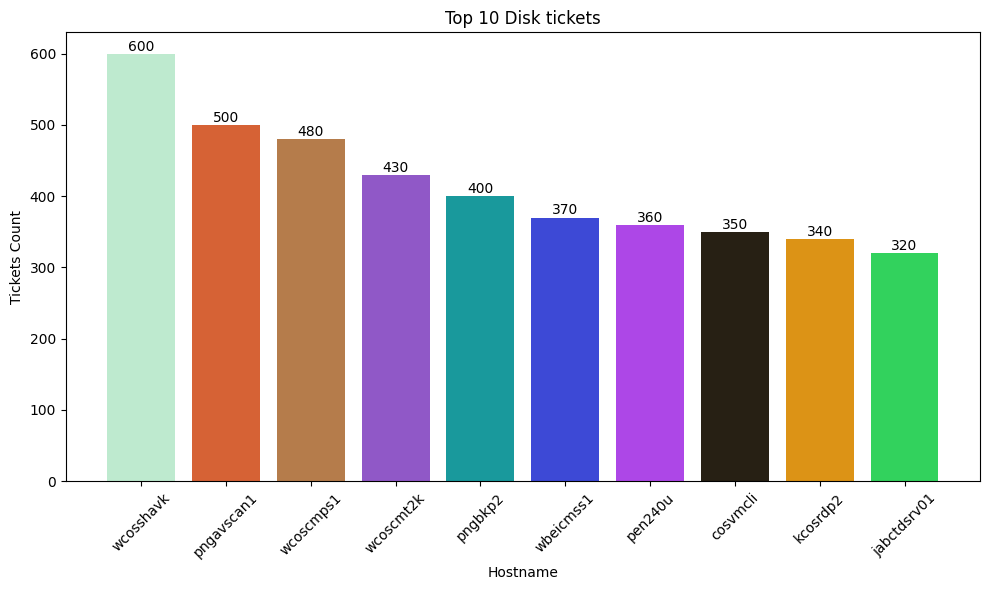

In [10]:
# Top 10 Disk Tickets

top_disk = dataset.sort_values(by=['Disk Ticket Count'], ascending=False).head(10)
x = top_disk['HostName']
y = top_disk['Disk Ticket Count']
num_bars = len(x)  # Number of bars
random_colors = np.random.rand(num_bars, 3)  # Generate random RGB values for each bar
plt.figure(figsize=(10,6))
plt.bar(x,y,color=random_colors)
plt.title('Top 10 Disk tickets')
plt.xlabel('Hostname')
plt.ylabel('Tickets Count')
# Add values on top of the bars
for i, v in enumerate(y):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=10)  # Adjust the offset (0.1) and font size as needed
plt.xticks(rotation=45)
plt.tight_layout() # space adjustment
plt.show()

### Pie Chart Visualization

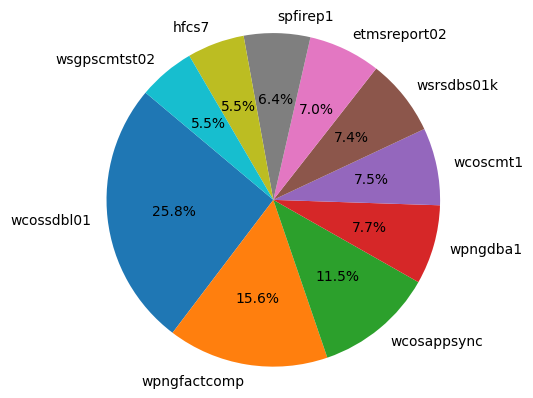

In [11]:
# Top 10 CPU Tickets

top_cpu = dataset.sort_values(by=['CPU Ticket Count'], ascending=False).head(10)
x = top_cpu['HostName']
y = top_cpu['CPU Ticket Count']
plt.pie(y,labels=x,autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.show()

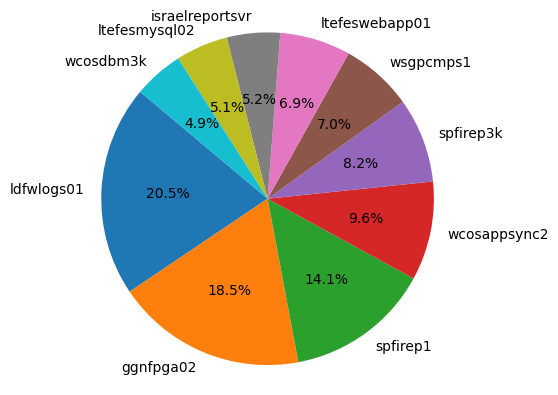

In [12]:
# Top 10 Memory Tickets

top_cpu = dataset.sort_values(by=['Memory Ticket Count'], ascending=False).head(10)
x = top_cpu['HostName']
y = top_cpu['Memory Ticket Count']
plt.pie(y,labels=x,autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.show()

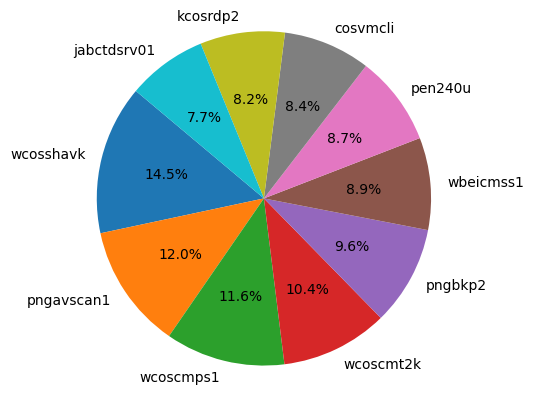

In [13]:
# Top 10 Disk Tickets

top_cpu = dataset.sort_values(by=['Disk Ticket Count'], ascending=False).head(10)
x = top_cpu['HostName']
y = top_cpu['Disk Ticket Count']
plt.pie(y,labels=x,autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.show()

## <b><center>-x-x- Thank You -x-x-</center><b>